In [ ]:
# 동네이름으로 연령별 인구 데이터 조회 ( 함수로 만들기 )

In [25]:
import csv

def str_to_int(v):
    v_without_comma = v.replace(",", "")
    n = int(v_without_comma)
    return n

def pop_by_region(region):
    with open("data-files/population-202302.csv", "rt", encoding="utf-8") as f:
        pop_reader = csv.reader(f)

        titles = next(pop_reader) # next : 한 줄 읽고 다음 행으로 이동
        rows = []
        for row in pop_reader:
            if region in row[0]:
                # rows.append(list(map(lambda v: int(v.replace(",", "")), row[3:104])))
                numeric_row = map(str_to_int, row[3:104]) 
                rows.append( list(numeric_row) )
    return rows

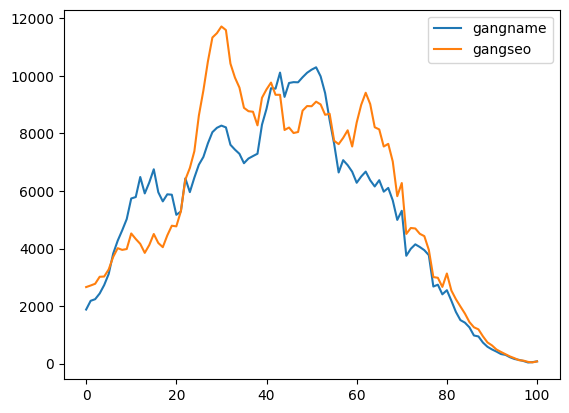

In [43]:
import matplotlib.pyplot as plt

rows1 = pop_by_region("강남")
rows2 = pop_by_region("강서")

plt.plot(rows1[0], label="gangname")
plt.plot(rows2[0], label="gangseo")
plt.legend()
plt.show()

In [29]:
# 특정 지역의 남성, 여성 인구 데이터 조회

import csv

def pop_by_region2(region):
    with open("data-files/population-202302.csv", "rt", encoding="utf-8") as f:
        pop_reader = csv.reader(f)

        titles = next(pop_reader) # 1행 읽기 -> 데이터를 가르키는 포인터가 2행으로 이동
        # print(titles[103], titles[106], titles[206], titles[209], titles[309])

        # [ { "지역명": "", "남":[], "여": [] } ]
        pop_data = []
        for row in pop_reader: # 2행 부터 순차적으로 next 자동 호출
            if row[0][-6] != '0' and region in row[0]: # row[0][-6] != '0' : 읍면동 데이터만 검색
                male_data = map(lambda v: int(v.replace(",", "")), row[106:207])
                female_data = map(lambda v: int(v.replace(",", "")), row[209:310])
                pop_data.append({ "region": row[0], "female" : list(female_data), "male": list(male_data) })

        return pop_data
            


In [38]:
import matplotlib.pyplot as plt

result = pop_by_region2("동소문")
if len(result) > 0:
    plt.plot(result[0]["male"], label="male")
    plt.plot(result[0]["female"], label="female")
    # plt.title("pop distribution of {0}".format(result[0]['region']))
    plt.legend()
    plt.show()


In [39]:
# 컬럼명의 위치 찾기
with open("data-files/population-202302.csv", "rt", encoding="utf-8") as f:
    pop_reader = csv.reader(f)

    titles = next(pop_reader) 

In [42]:
def name_to_idx(name):
    for idx, title in enumerate(titles):
        if name in title:
            return idx, title

In [44]:
name_to_idx("_남_0"), name_to_idx("_남_100")

((106, '2023년02월_남_0세'), (206, '2023년02월_남_100세 이상'))

In [ ]:
# 지역, 성별을 기준으로 데이터 조회